In [1]:
import pandas as pd

## Učitavanje podataka

In [2]:
# Ucitaj skup podataka
df = pd.read_csv('Datasets/weatherAUS.csv')

# Prikazi dimenzije skupa
df.shape

(145460, 23)

In [3]:
# Prikazi prvih nekoliko redaka
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Prikazi osnovne informacije o skupu podataka
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Pronađi kategorijske varijable
categorical = [var for var in df.columns if df[var].dtype=='O']

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [6]:
# Prikazi kardinalnost u kategorijskim varijablama
for var in categorical:
    print(var, len(df[var].unique()))

Date 3436
Location 49
WindGustDir 17
WindDir9am 17
WindDir3pm 17
RainToday 3
RainTomorrow 3


## Obrada podataka

In [7]:
# Razdvoji datum u individualne vrijednosti
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace = True)
if 'Date' in categorical:
    categorical.remove('Date')

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [8]:
# Provjeri postoje li prazne vrijednosti
df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [9]:
# Popuni prazne vrijednosti kategoričkih vrijednosti sa najcescom vrijednosti
for cat_col in categorical:
    mode_value = df[cat_col].mode()[0]
    df[cat_col].fillna(mode_value, inplace=True)

df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [10]:
# Prikaz numerckih varijaabli
numerical = [col for col in df.columns if df[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [11]:
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

In [12]:
# Popuni numericke vrijednosti sa srednjom vrijednosti
for num_col in numerical:
    median_value = df[num_col].median()
    df[num_col].fillna(median_value, inplace=True)

df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

locationEncoder = LabelEncoder()
windEncoder = LabelEncoder()
df['Location'] = locationEncoder.fit_transform(df['Location'])

df['RainTomorrow'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1})
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1})
df['WindGustDir'] = windEncoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = windEncoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = windEncoder.fit_transform(df['WindDir3pm'])

## Vizualizacija podataka

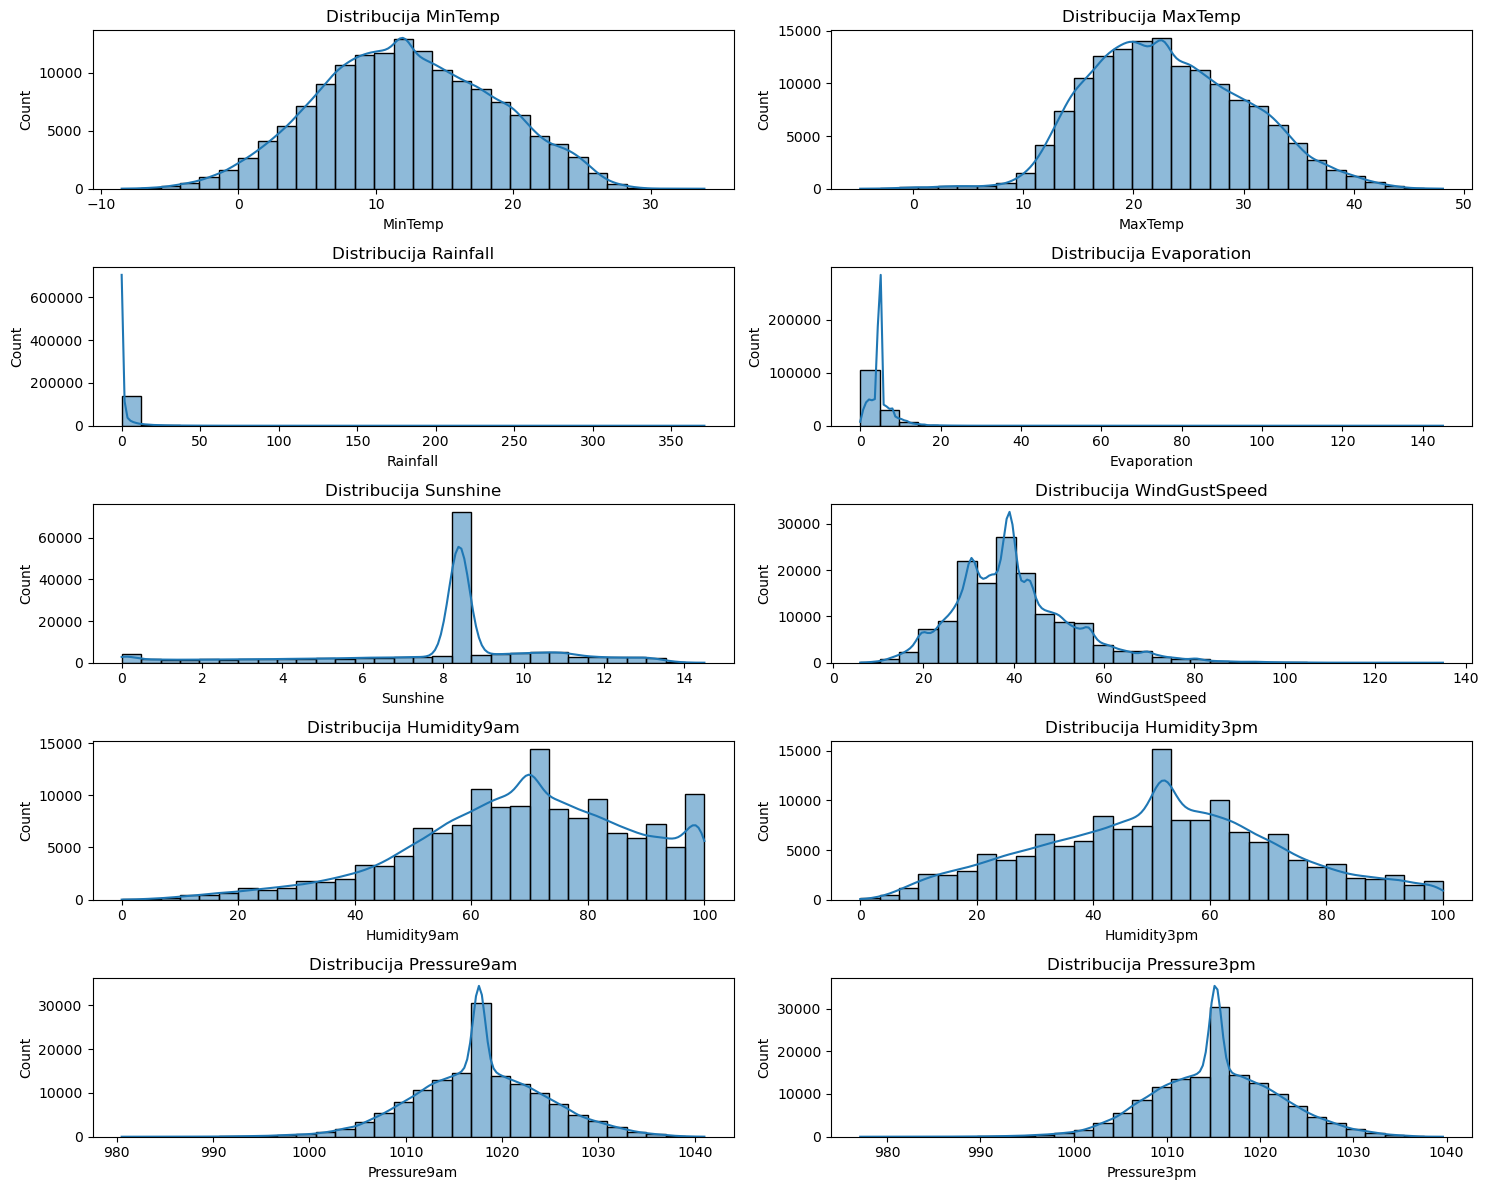

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Odabir atributa za prikaz 
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribucija {feature}')

plt.tight_layout()
plt.show()

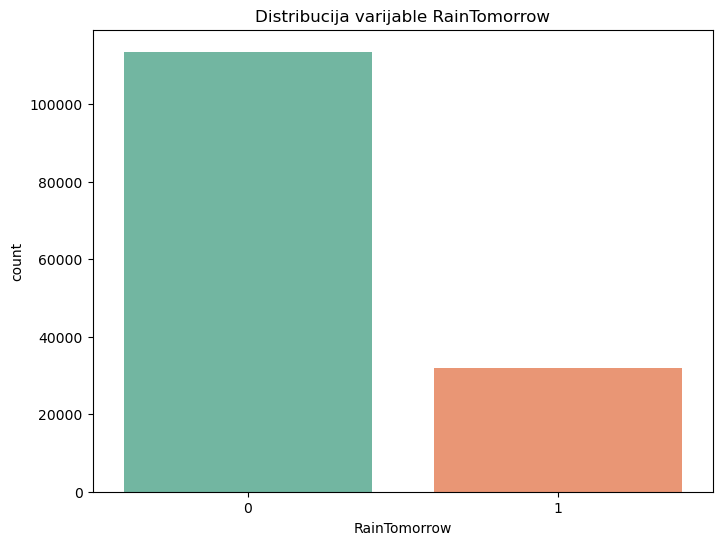

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RainTomorrow', palette="Set2")
plt.title('Distribucija varijable RainTomorrow')
plt.show()

Text(0, 0.5, 'WindSpeed3pm')

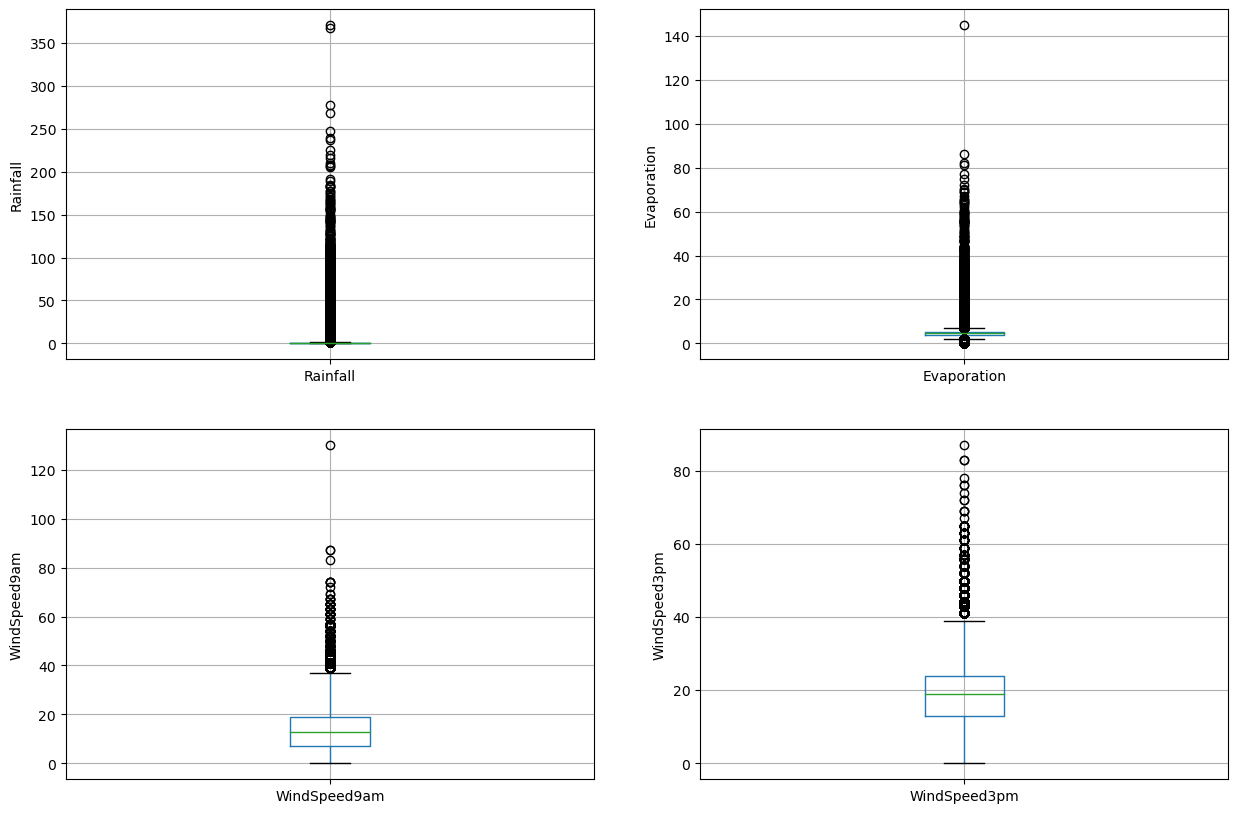

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

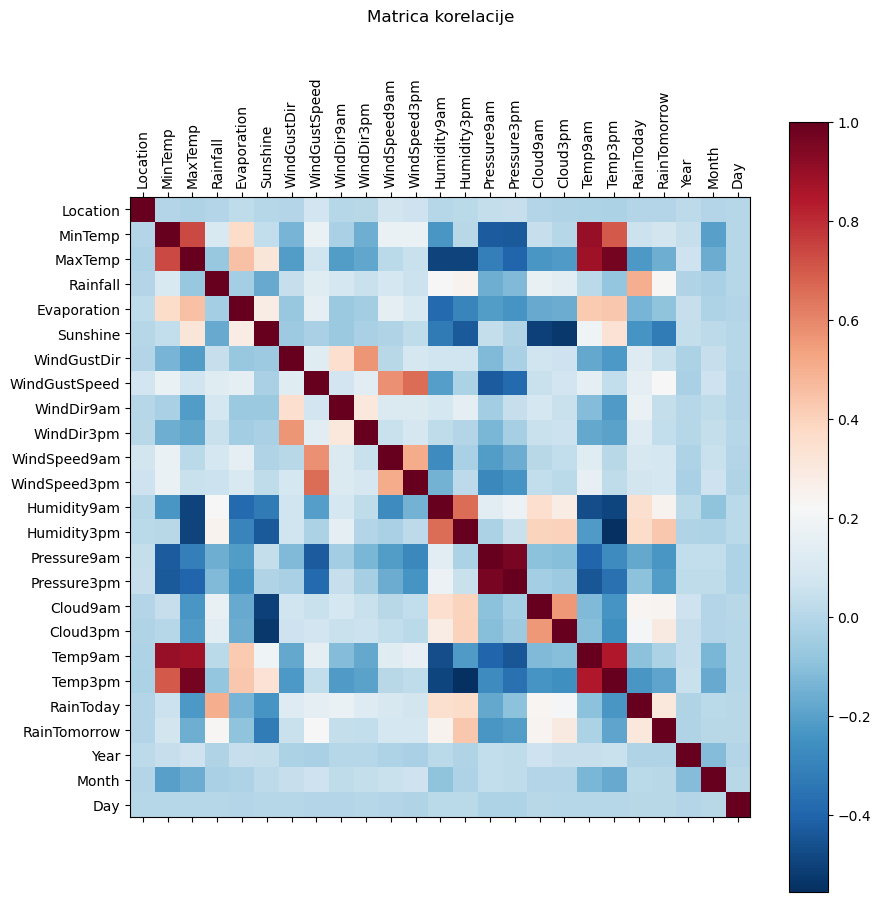

In [17]:
# Prikazi korelaciju izmedu atributa
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr, cmap='RdBu_r') 

ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

plt.colorbar(cax)
plt.title("Matrica korelacije", pad=40) 
plt.show()

## Preporuka optimalnog algoritma koritšenjem meta-učenja

#### Izračunavanje performansi i ARR mjere za skupove koji služe za izgradnju baze znanja meta-učenja

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from MtLModelAnalysis import *

preprocessed_datasets, target_variable_names = init_datasets()
algoritmi = algoritmi = {
            'LR': LogisticRegression(solver='lbfgs', max_iter=10000),
            'LDA': LinearDiscriminantAnalysis(),
            'CART': DecisionTreeClassifier(),
            "NB": GaussianNB(),
            "SVM": SVC(probability=True),
            "KNN": KNeighborsClassifier()
        }

alg_performances = []

for X, y in preprocessed_datasets:
    perforanseAlg = izracunaj_performanse_norm(X, y, algoritmi)
    alg_performances.append(perforanseAlg)

alg_arr_values = []
alg_arr_values2 = [] # Za informativni graf prikazujemo ARR sa alfa = 0 i alfa = 0.2
alg_arr_values3 = []

for dataset_alg_performance in alg_performances:
    alg_arr_value = izracunaj_ARR(dataset_alg_performance)
    alg_arr_values.append(alg_arr_value)

    alg_arr_values2.append(izracunaj_ARR(dataset_alg_performance , 0))
    alg_arr_values3.append(izracunaj_ARR(dataset_alg_performance, 0.2))

#### Grafički prikaz performansi algoritama nad skupovima podataka za bazu znanja

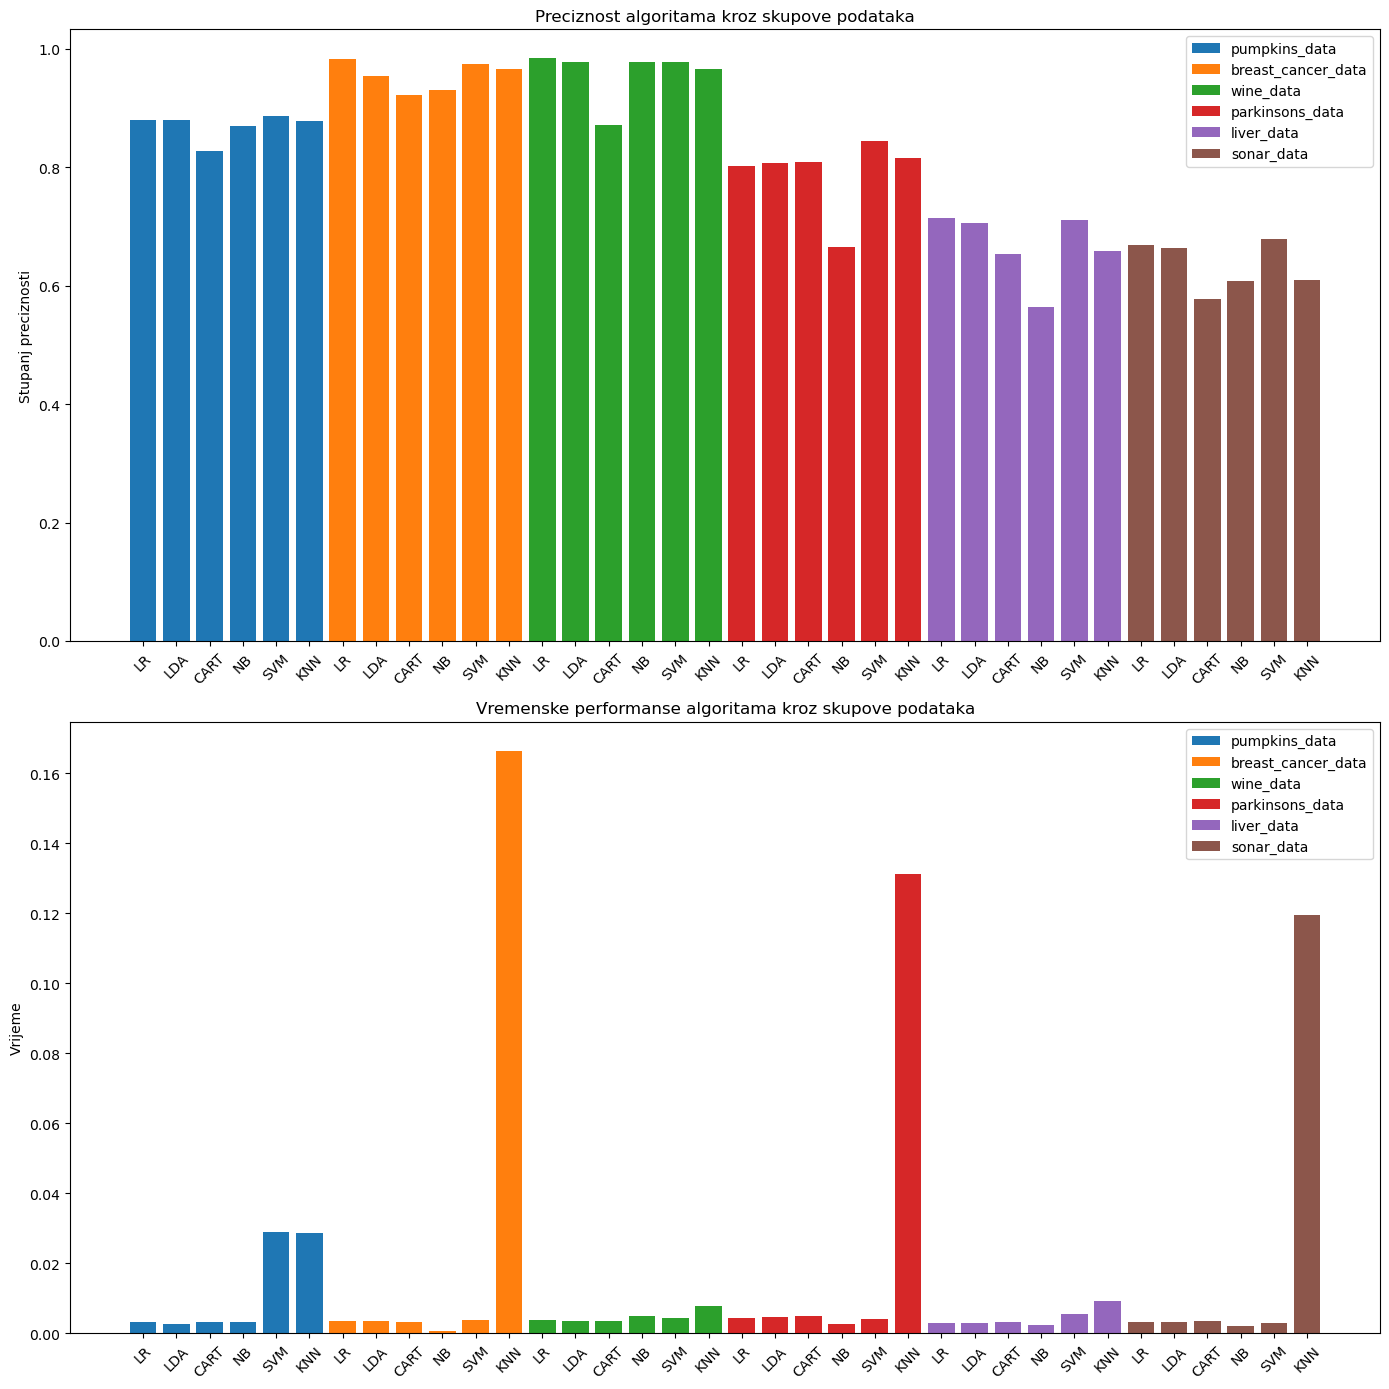

In [19]:
import matplotlib.pyplot as plt

dataset_names = list(target_variable_names.keys())

num_datasets = len(alg_performances)
algorithms = alg_performances[0]['Algoritam'].values

fig, ax = plt.subplots(2, 1, figsize=(14, 14))

bar_width = 0.1
spacing = 0.15

for index, (data, dataset_name) in enumerate(zip(alg_performances, dataset_names)):
    ax[0].bar(algorithms + "_" + str(index + 1), data['PreciznostAlgoritma'], label=dataset_name)
    ax[1].bar(algorithms + "_" + str(index + 1), data['VrijemeIzvrsavanja'], label=dataset_name)

ax[0].set_title('Preciznost algoritama kroz skupove podataka')
ax[0].set_ylabel('Stupanj preciznosti')
ax[0].set_xticks([(algo + "_" + str(i+1)) for i in range(num_datasets) for algo in algorithms])
ax[0].set_xticklabels([algo for i in range(num_datasets) for algo in algorithms], rotation=45)
ax[0].legend()

ax[1].set_title('Vremenske performanse algoritama kroz skupove podataka')
ax[1].set_ylabel('Vrijeme')
ax[1].set_xticks([(algo + "_" + str(i+1)) for i in range(num_datasets) for algo in algorithms])
ax[1].set_xticklabels([algo for i in range(num_datasets) for algo in algorithms], rotation=45)
ax[1].legend()

plt.tight_layout()
plt.show()

 #### Grafički prikaz vrijednosti ARR(Adjusted ratio of ratios) mjera algoritama za skupove podataka za bazu znanja

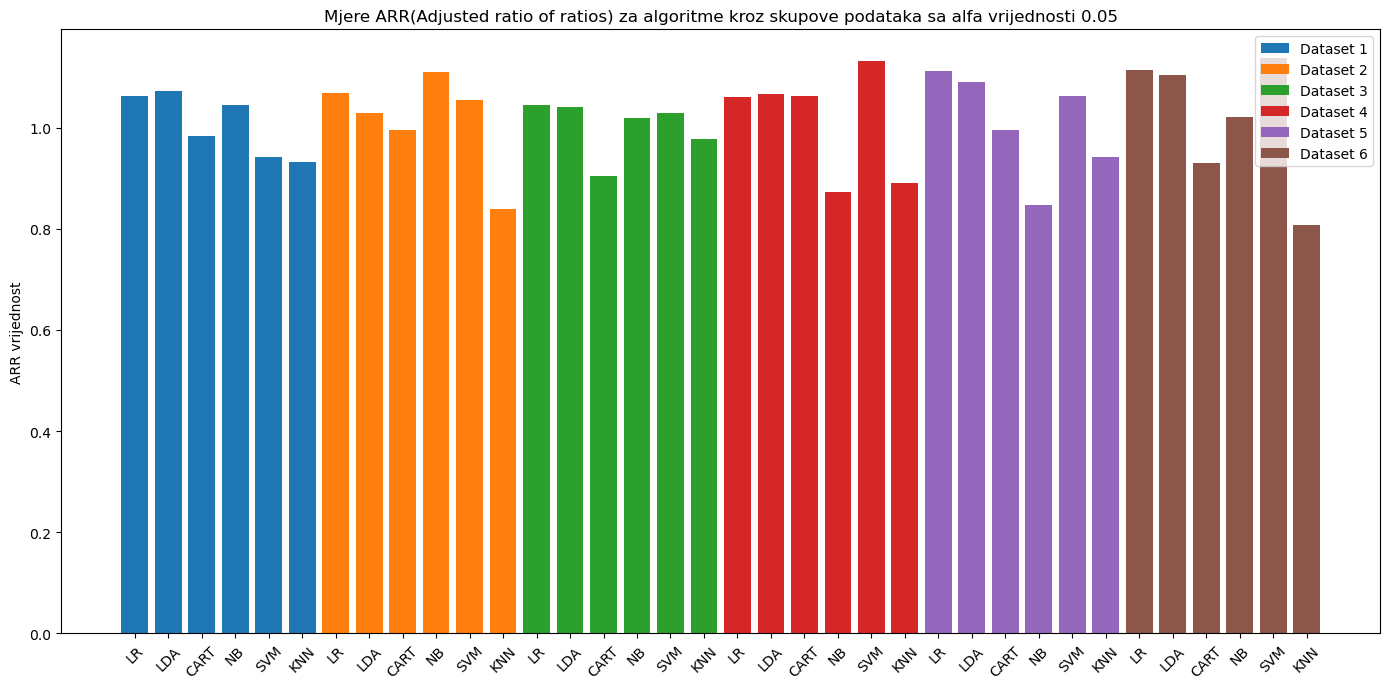

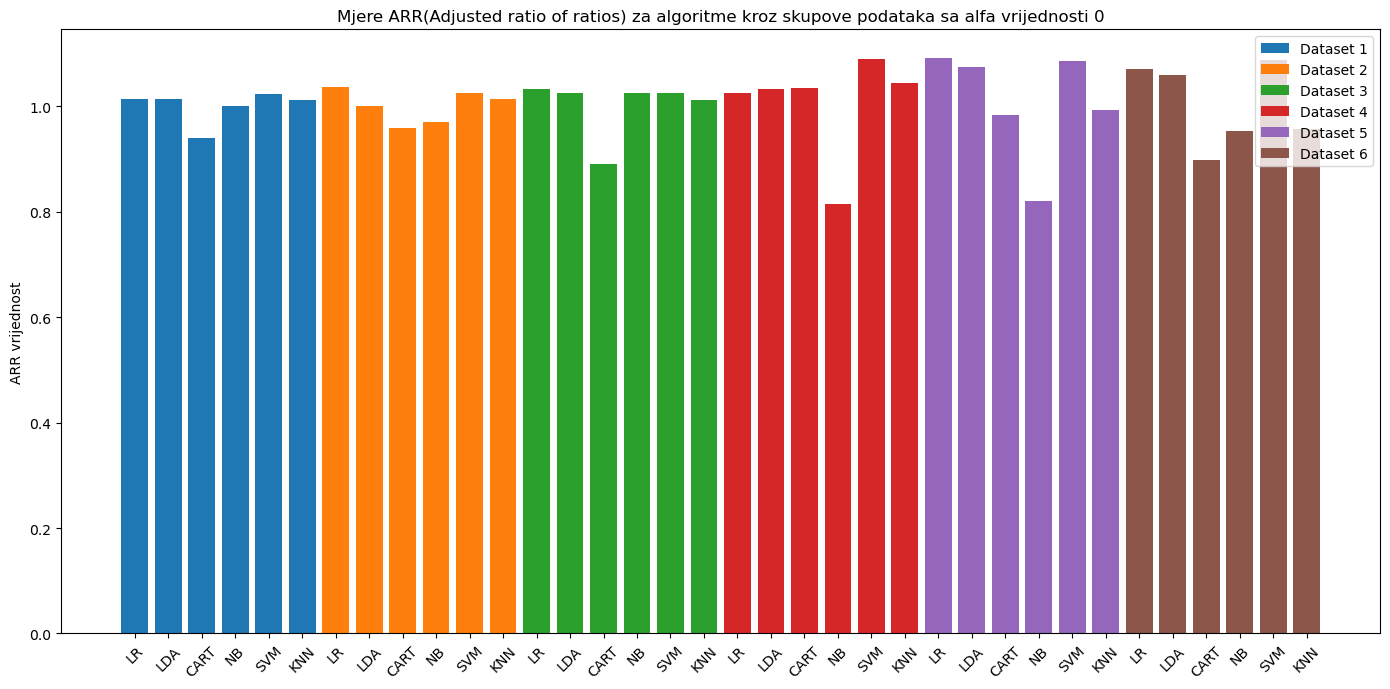

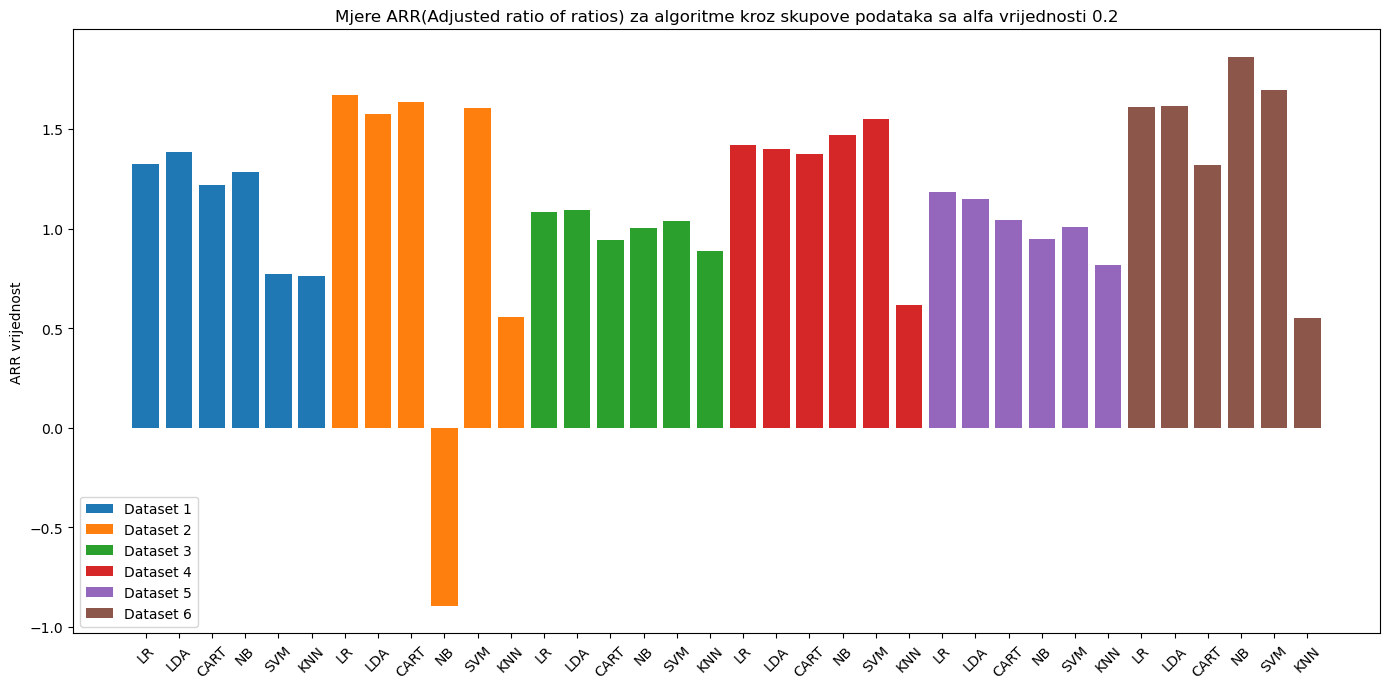

In [20]:
def plot_arr_values(arr_values_list, alfa_vrijednost):

    num_datasets = len(arr_values_list)
    algorithms = list(arr_values_list[0].keys())

    fig, ax = plt.subplots(figsize=(14, 7))

    for index, data in enumerate(arr_values_list):
        values = [data[algo] for algo in algorithms]
        ax.bar([algo + "_" + str(index + 1) for algo in algorithms], values, label='Dataset ' + str(index + 1))

    ax.set_title('Mjere ARR(Adjusted ratio of ratios) za algoritme kroz skupove podataka sa alfa vrijednosti ' + alfa_vrijednost)
    ax.set_ylabel('ARR vrijednost')
    
    ax.set_xticks([(algo + "_" + str(i+1)) for i in range(num_datasets) for algo in algorithms])
    ax.set_xticklabels([algo for i in range(num_datasets) for algo in algorithms], rotation=45)
    
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_arr_values(alg_arr_values, "0.05")
plot_arr_values(alg_arr_values2, "0")
plot_arr_values(alg_arr_values3, "0.2")

## Računanje i prikazivanje vrijednosti meta-značajki

#### Izračunavanje meta-značajki skupova podataka meta-modela

In [21]:
import copy
best_algorithms = []

# Postavi najbolji algoritam za svaki skup podataka
for arr_values in alg_arr_values:
    best_algorithm = max(arr_values, key=arr_values.get)
    best_value = arr_values[best_algorithm]
    best_algorithms.append({best_algorithm: best_value})

mfe_categories = ["general", "statistical", "info-theory", "model-based", "landmarking"]

meta_knowledge_mfe = []

for (X, y), best_algo in zip(preprocessed_datasets, best_algorithms):
    dataset_metafeatures = []
    
    for category in mfe_categories:
        mfe = MFE(groups=category, summary=["median"])
        metafeatures = compute_metafeatures(X.to_numpy(), y, mfe)
        for key, value in metafeatures.items():
            if np.isnan(value):
                metafeatures[key] = 0
        dataset_metafeatures.append(metafeatures)
    
    dataset_metafeatures.append({"bestAlg": list(best_algo.keys())[0]})
    meta_knowledge_mfe.append(dataset_metafeatures)

c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\statistical.py:1267: RuntimeWarning: invalid value encountered in log
  np.log(np.linalg.det(S_i)) for S_i in sample_cov_matrices
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\statistical.py:1272: RuntimeWarning: invalid value encountered in log
  * np.log(np.linalg.det(pooled_cov_mat))
c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was ren

In [22]:
# Pripremi vrijednosti meta-znacajki za model
def replace_dicts_with_values_exclude_last(data):
    replaced_data = []
    for sublist in data:
        replaced_sublist = [list(d.values()) if isinstance(d, dict) else d for d in sublist[:-1]]
        replaced_data.append(replaced_sublist)
    return replaced_data

meta_feature_model_dataset = replace_dicts_with_values_exclude_last(meta_knowledge_mfe)

#### Računanje meta-značajki trenutnog skupa podataka

In [23]:
rain_dataset_mfe = []

rain_y = df['RainTomorrow']
rain_X = df.drop(columns=['RainTomorrow'])

for category in mfe_categories:
    mfe = MFE(groups=category, summary=["median"])
    metafeatures = compute_metafeatures(rain_X.to_numpy(), rain_y.to_numpy(), mfe)
    for key, value in metafeatures.items():
        if np.isnan(value):
            metafeatures[key] = 0
    rain_dataset_mfe.append(metafeatures)

all_metafeature_values = meta_knowledge_mfe.copy()
all_metafeature_values.append(rain_dataset_mfe)

all_datasets = list(target_variable_names.keys())
all_datasets.append('rain_data')

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:731: RuntimeWarning: Can't summarize feature 'g_mean' with summary 'median'. Will set it as 'np.nan'.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:606: RuntimeWarning: Can't extract feature 'h_mean'.
 Exception message: ValueError('Harmonic mean only 

#### Grafički prikaz meta-značajki svih skupova podataka meta-modela

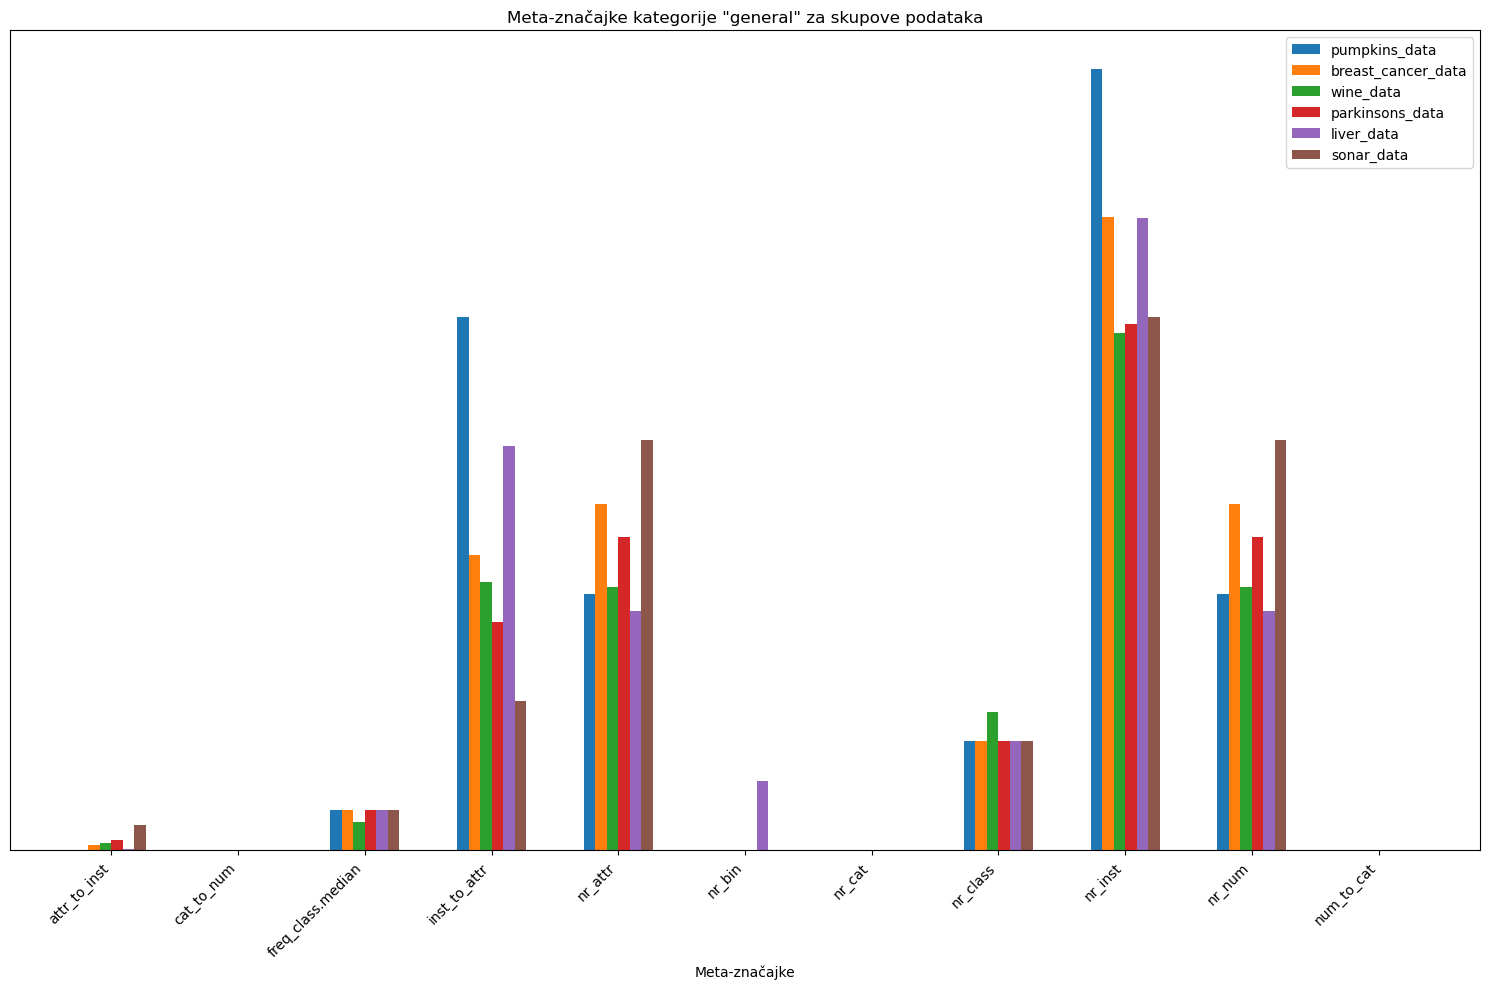

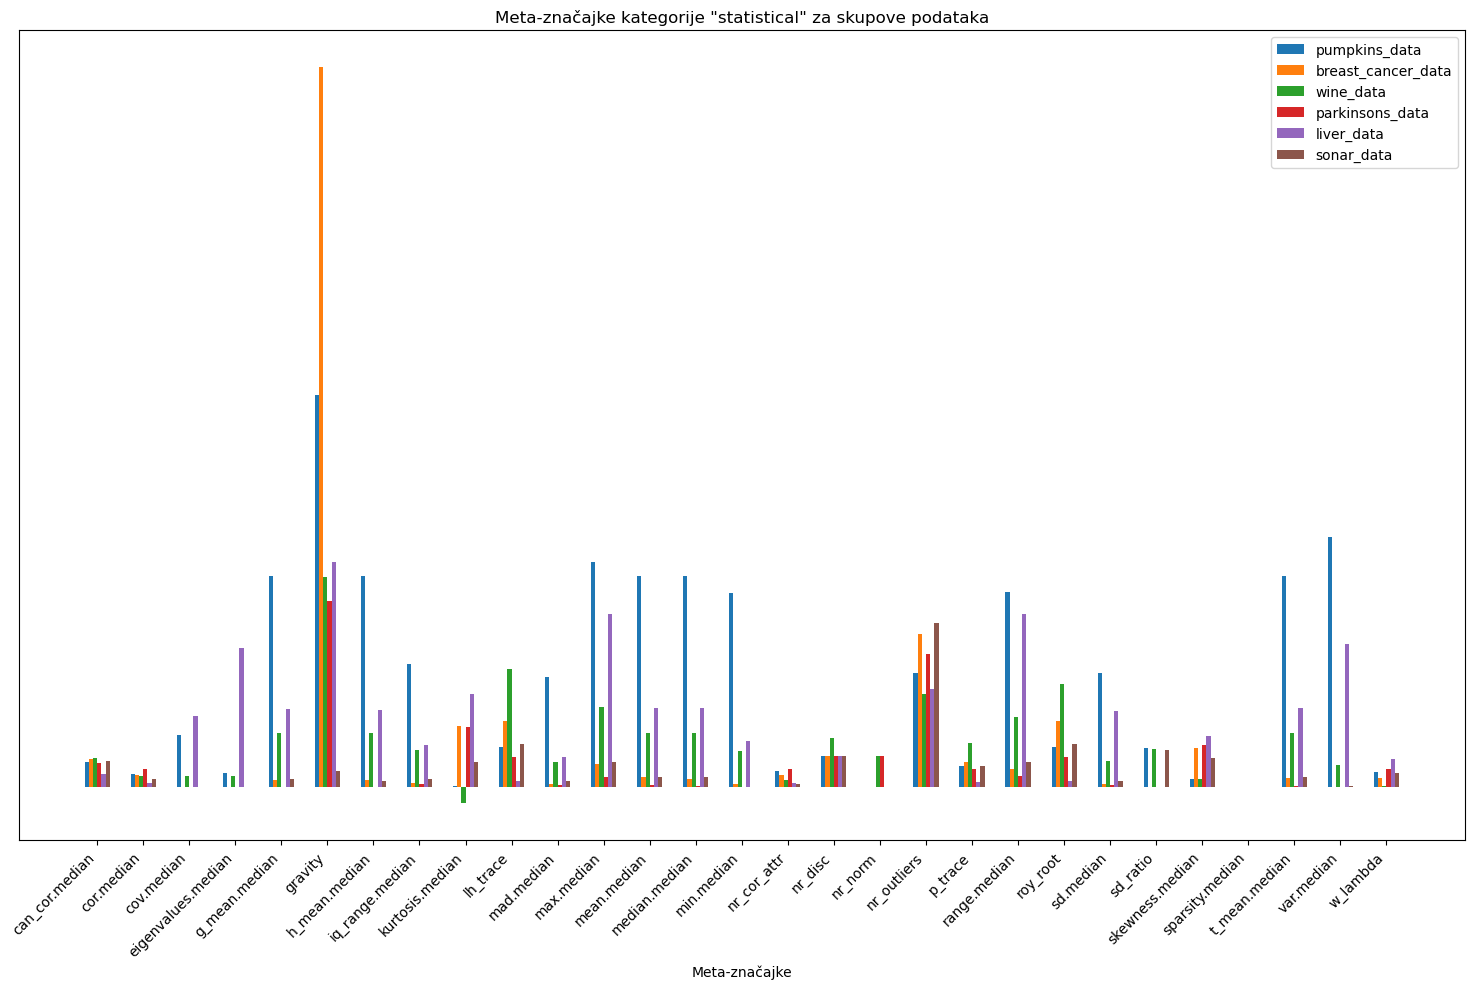

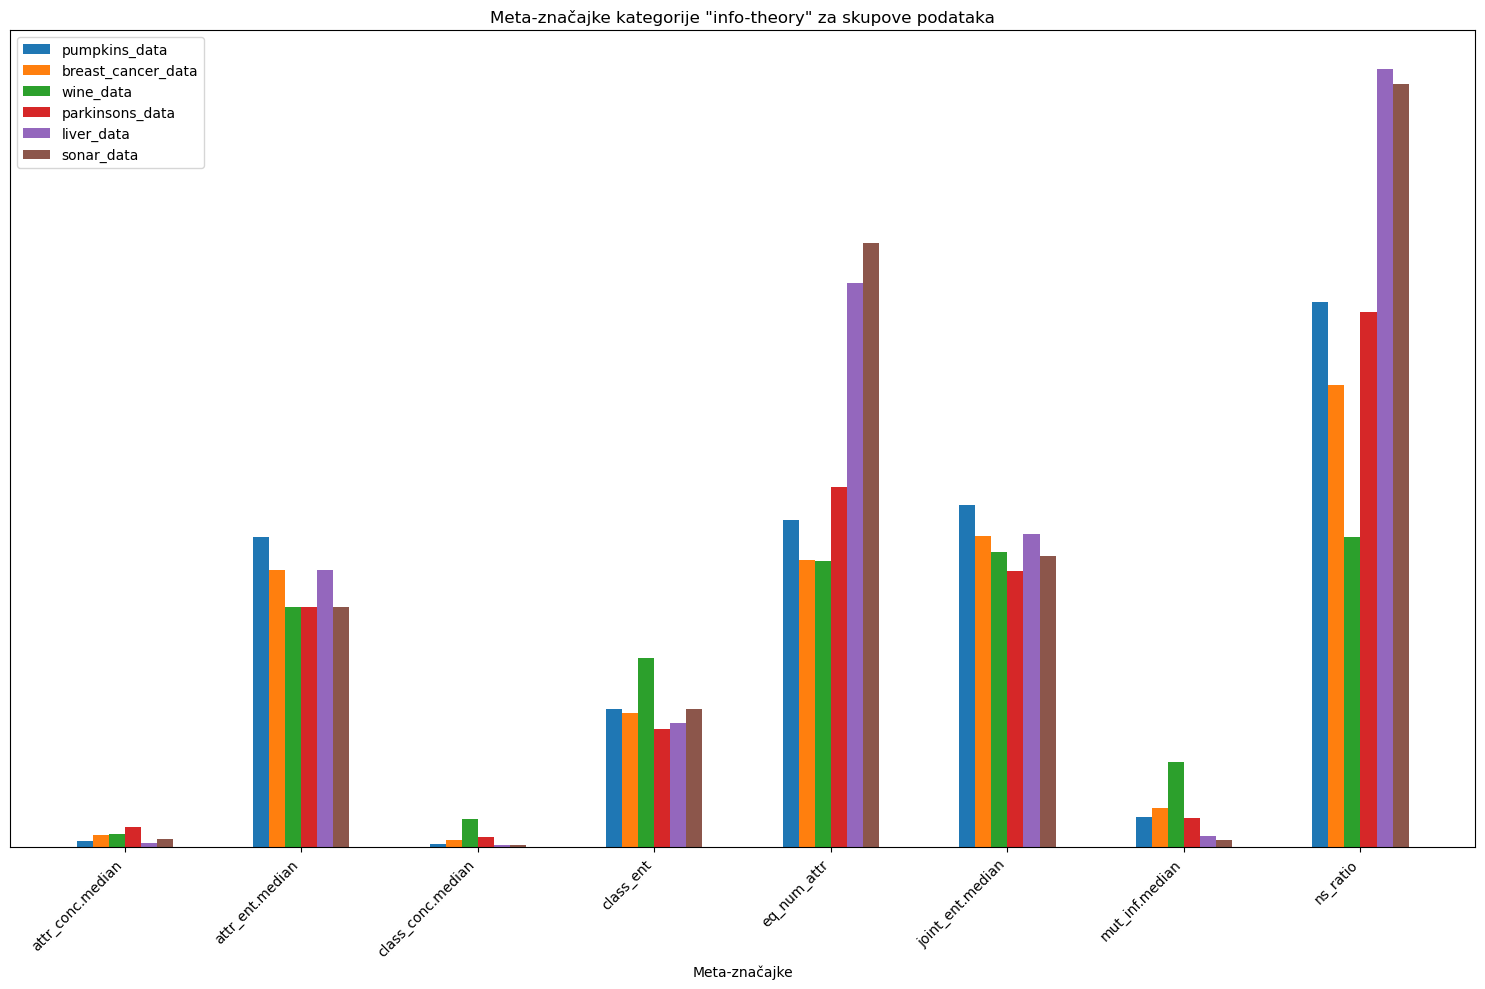

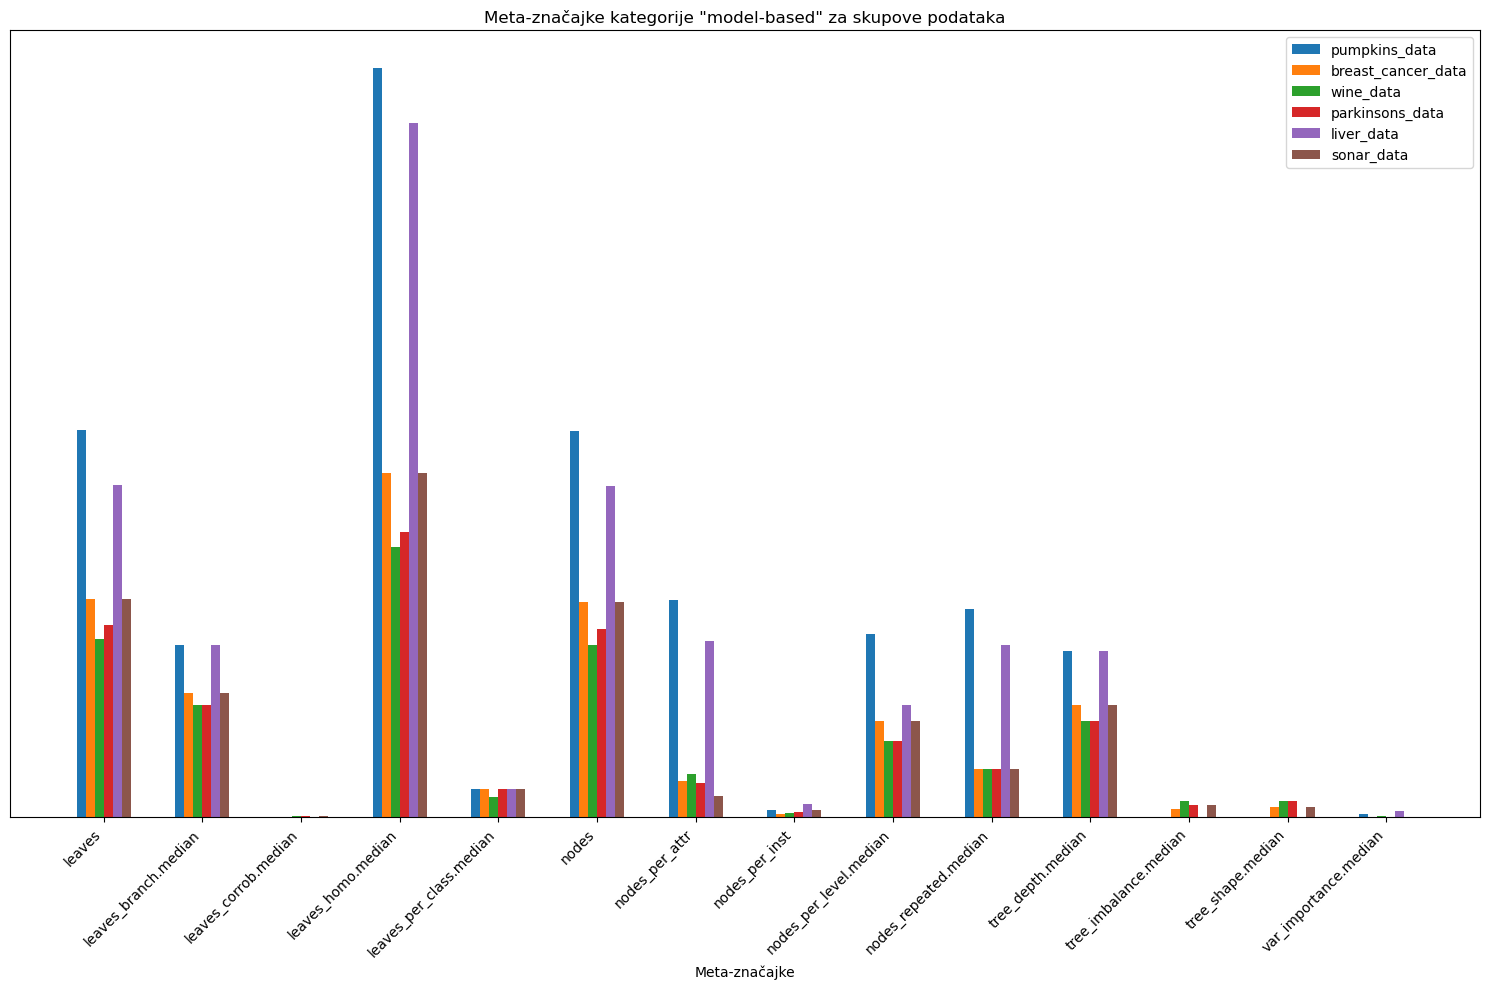

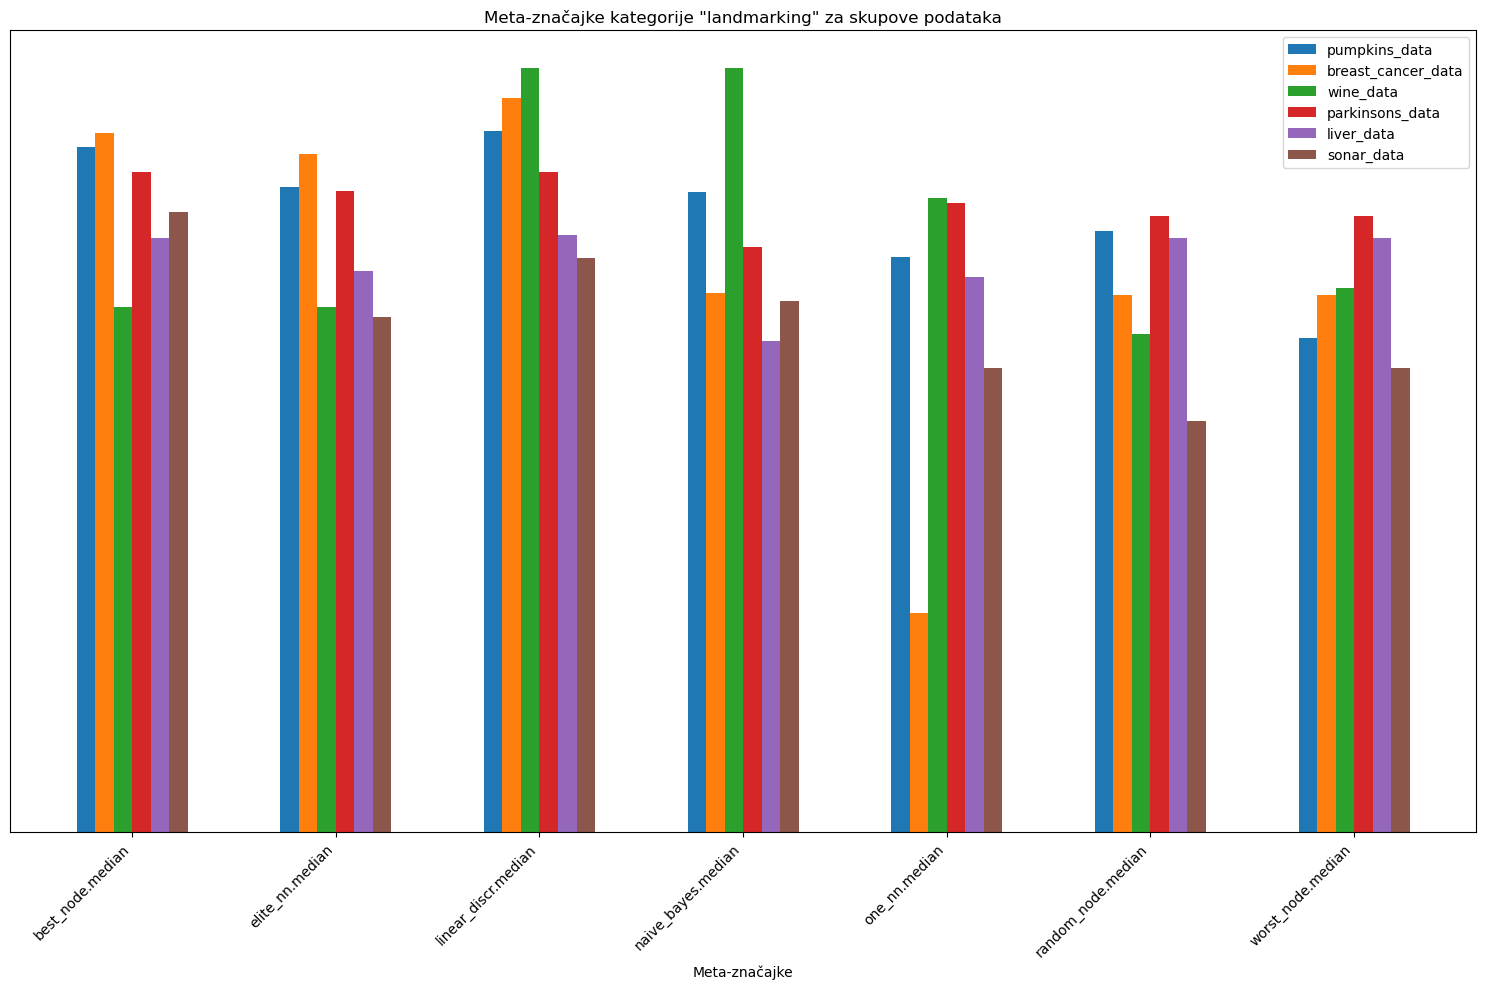

In [24]:
def log_transform(df):
    return np.log1p(df)

for group_idx, category in enumerate(mfe_categories):

    current_group_metafeatures = [dataset_metafeatures[group_idx] for dataset_metafeatures in meta_knowledge_mfe]
    graph_data = pd.DataFrame(current_group_metafeatures)

    if 'bestAlg' in graph_data.columns:
        graph_data.drop('bestAlg', axis=1, inplace=True)
    graph_data = graph_data.transpose()
    graph_data.columns = target_variable_names.keys()

    graph_data_transformed = graph_data.apply(log_transform)

    bar_width = 0.1
    spacing = 0.1
    index = [i + i*spacing for i in range(len(graph_data_transformed.index))]

    fig, ax = plt.subplots(figsize=(15, 10))

    for i, dataset in enumerate(graph_data_transformed.columns):
        ax.bar([x + i*bar_width for x in index], graph_data_transformed[dataset], width=bar_width, label=dataset)

    ax.set_xlabel('Meta-značajke')
    ax.set_title(f'Meta-značajke kategorije "{category}" za skupove podataka')
    ax.set_xticks([x + (bar_width*(len(graph_data_transformed.columns)-1)/2) for x in index])
    ax.set_xticklabels(graph_data_transformed.index, rotation=45, ha='right')
    ax.legend()

    ax.set_yticks([])
    ax.set_ylabel('')

    plt.tight_layout()
    plt.show()

#### Grafički prikaz meta-značajki svih skupova podataka meta-modela i ciljanog skupa podataka

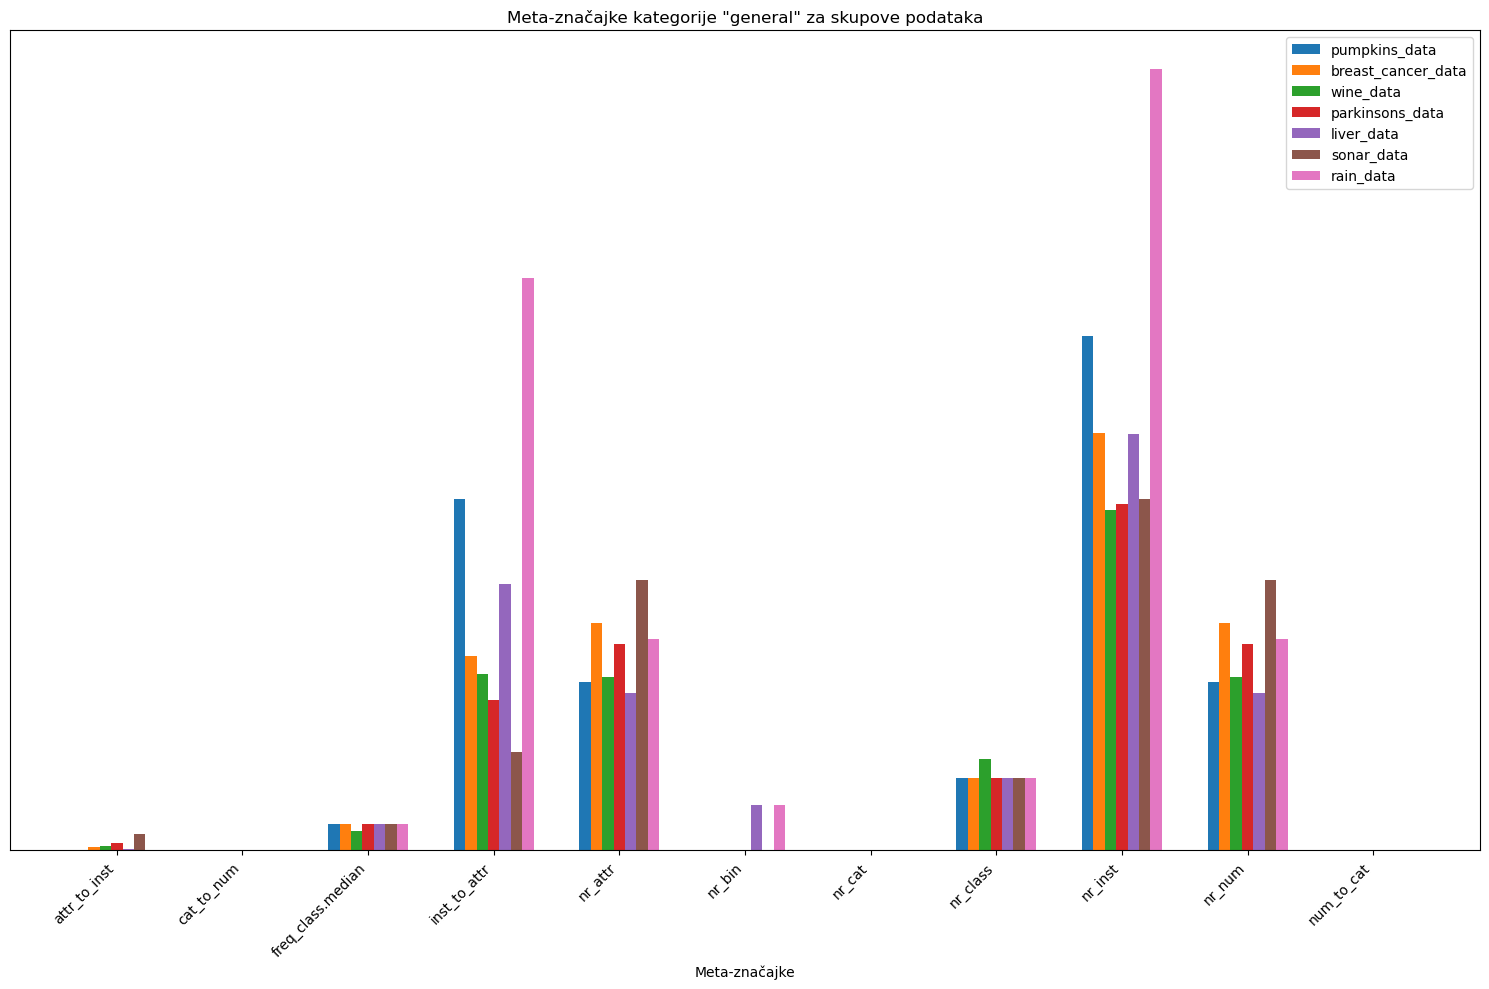

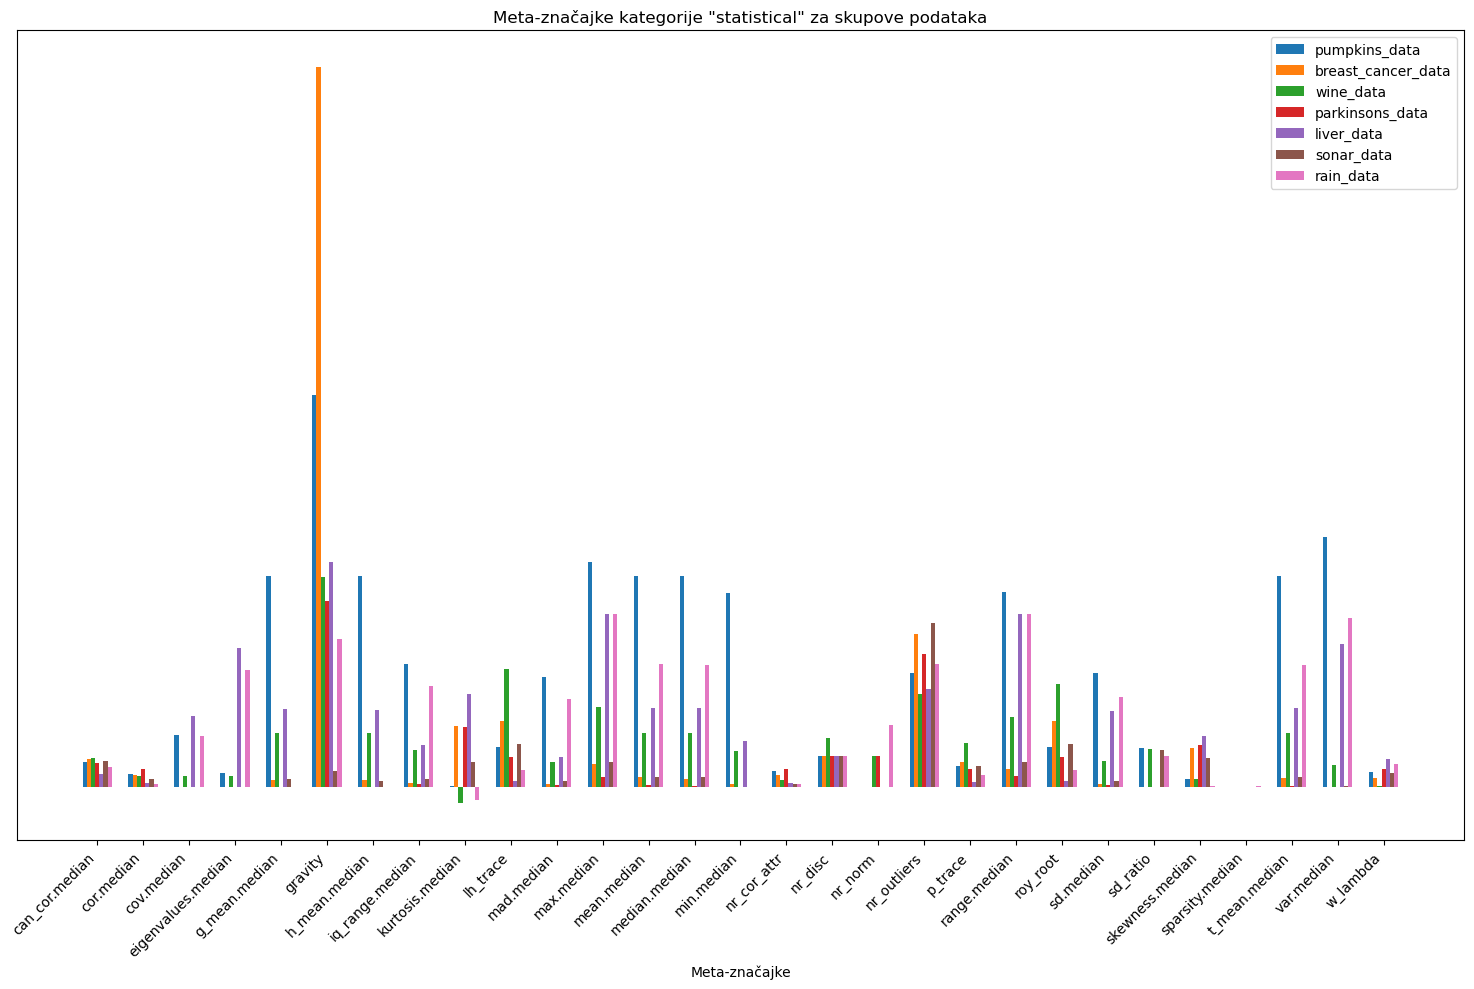

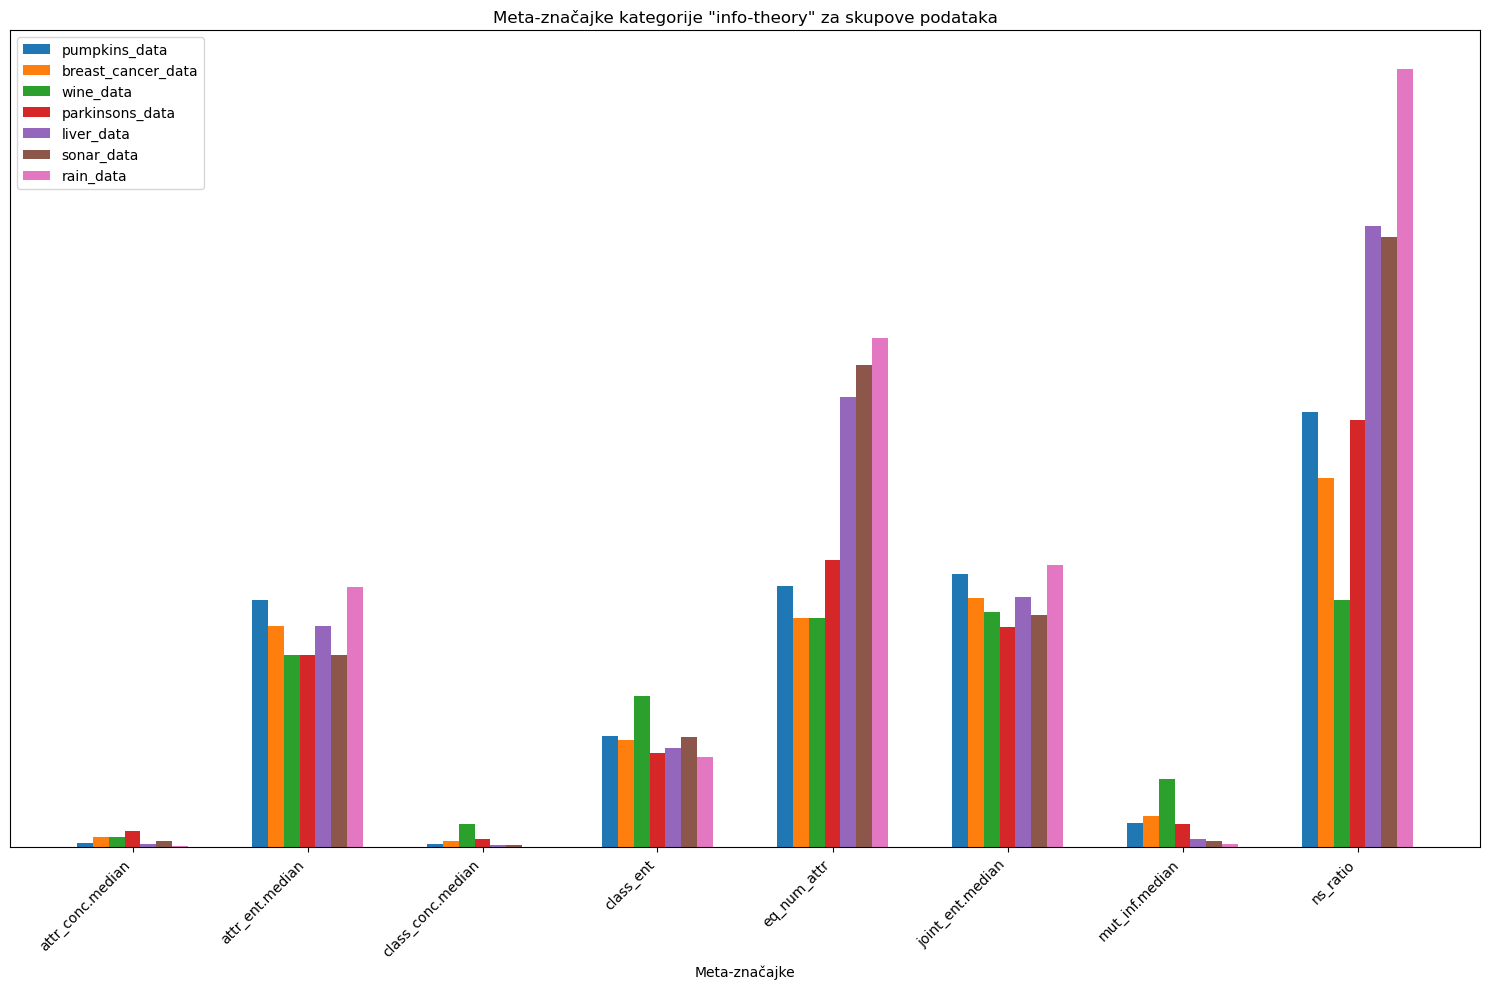

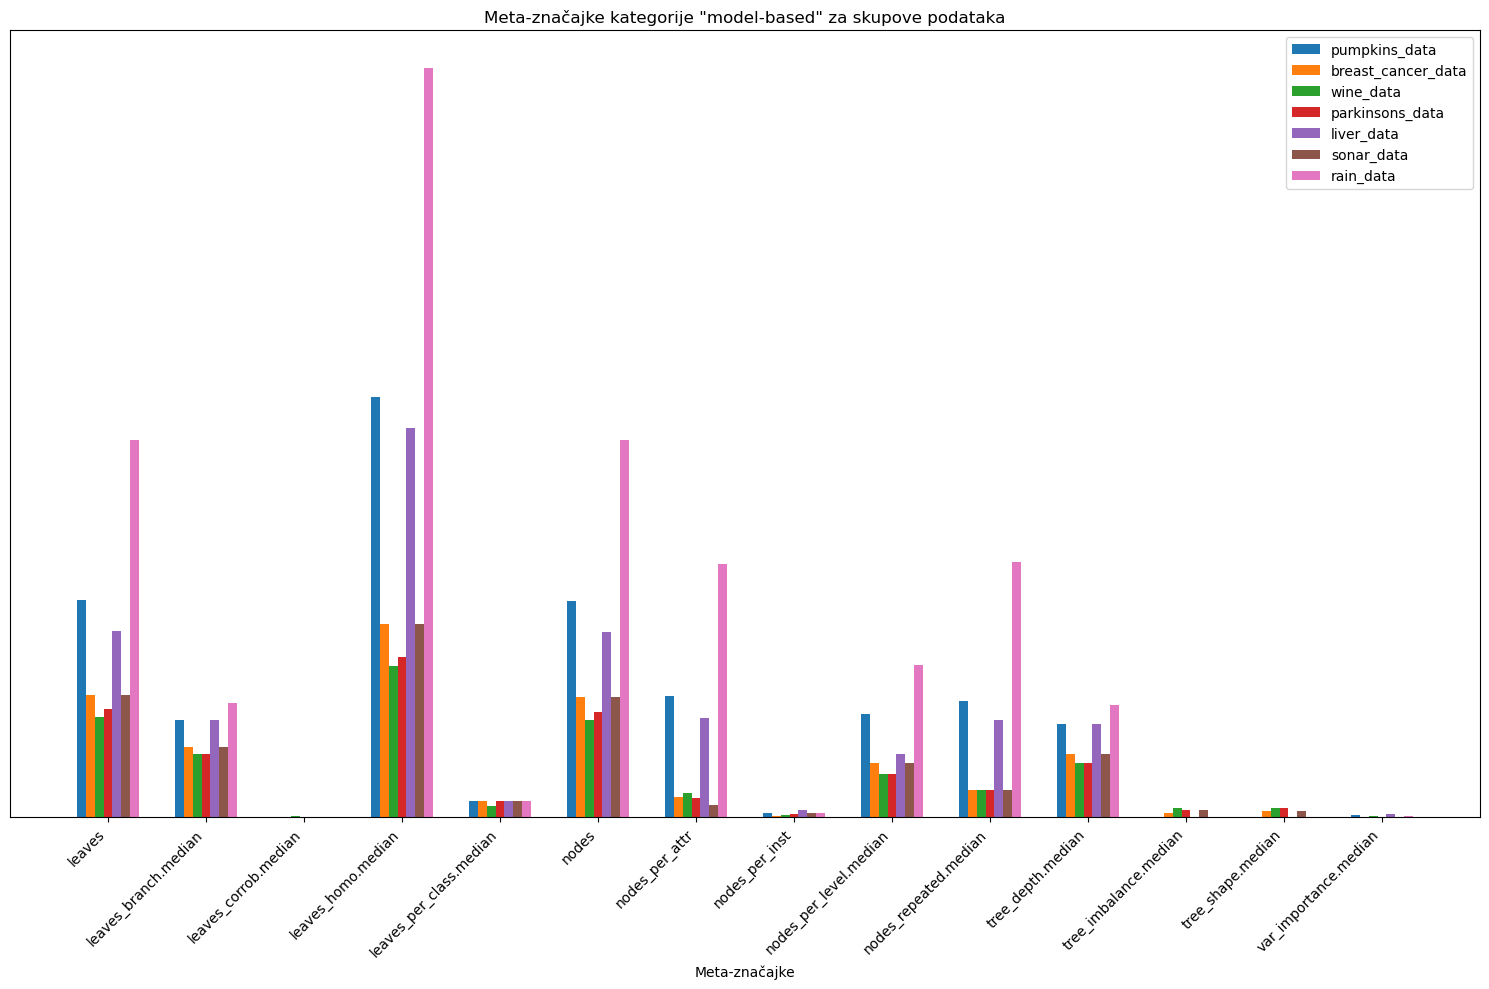

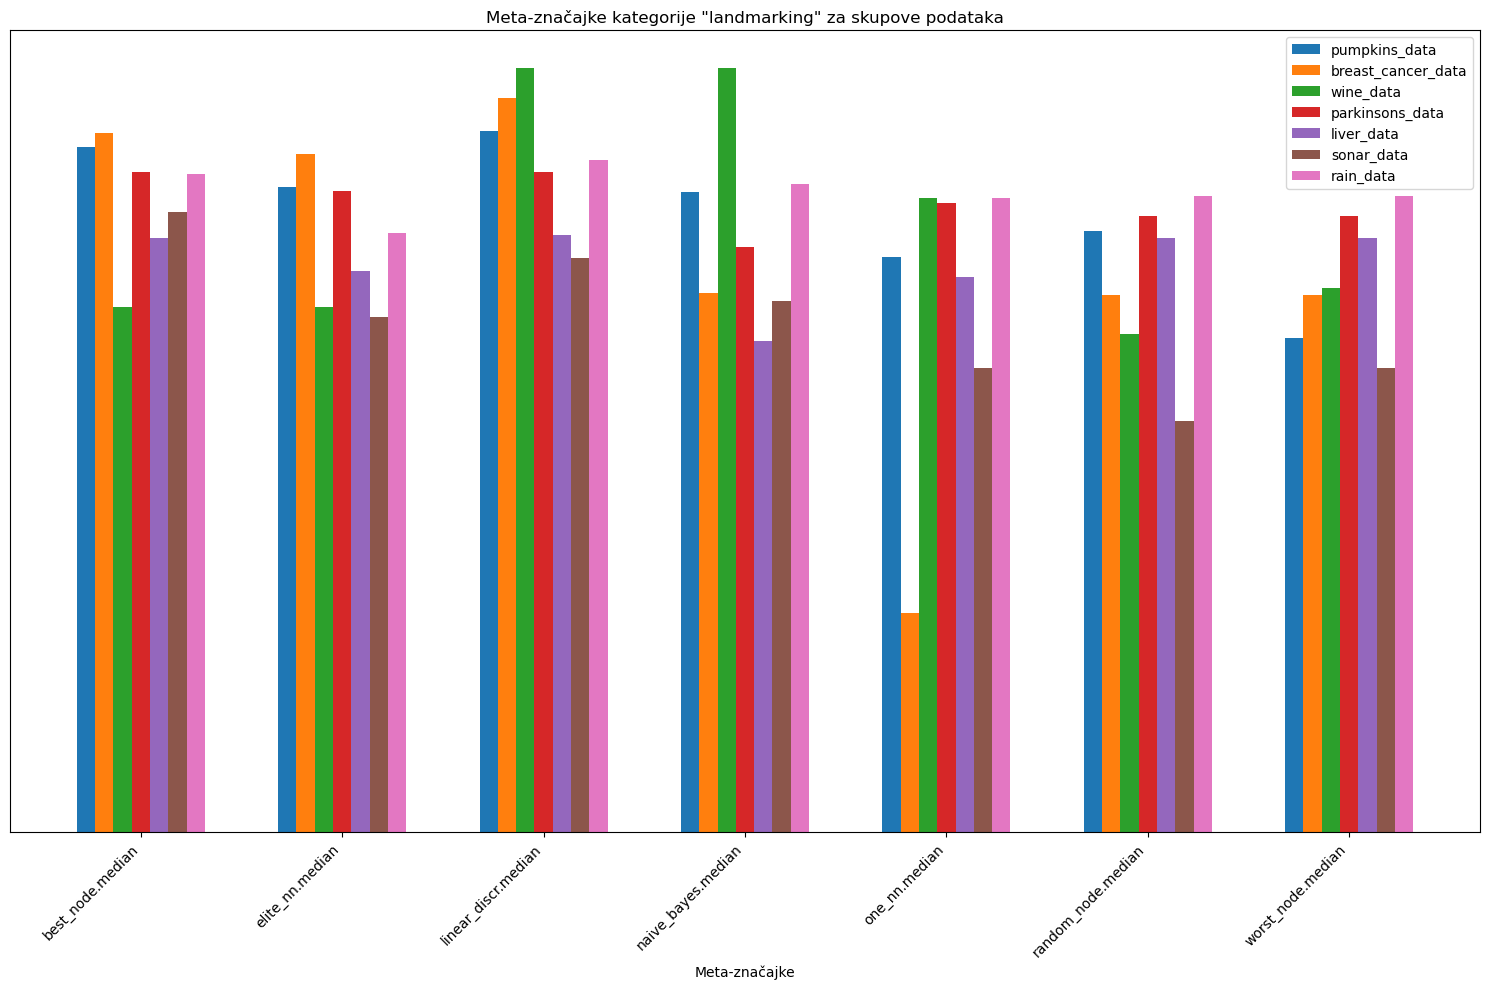

In [25]:
def log_transform(df):
    return np.log1p(df)

for group_idx, category in enumerate(mfe_categories):

    current_group_metafeatures = [dataset_metafeatures[group_idx] for dataset_metafeatures in all_metafeature_values]
    graph_data = pd.DataFrame(current_group_metafeatures)

    if 'bestAlg' in graph_data.columns:
        graph_data.drop('bestAlg', axis=1, inplace=True)
    graph_data = graph_data.transpose()
    graph_data.columns = all_datasets

    graph_data_transformed = graph_data.apply(log_transform)

    bar_width = 0.1
    spacing = 0.1
    index = [i + i*spacing for i in range(len(graph_data_transformed.index))]

    fig, ax = plt.subplots(figsize=(15, 10))

    for i, dataset in enumerate(graph_data_transformed.columns):
        ax.bar([x + i*bar_width for x in index], graph_data_transformed[dataset], width=bar_width, label=dataset)

    ax.set_xlabel('Meta-značajke')
    ax.set_title(f'Meta-značajke kategorije "{category}" za skupove podataka')
    ax.set_xticks([x + (bar_width*(len(graph_data_transformed.columns)-1)/2) for x in index])
    ax.set_xticklabels(graph_data_transformed.index, rotation=45, ha='right')
    ax.legend()

    ax.set_yticks([])
    ax.set_ylabel('')

    plt.tight_layout()
    plt.show()

#### Učenje meta-učenika te izračunavanje preporučenih algoritama

In [26]:
#New code
scaler = StandardScaler()
algorithm_names = [meta[-1]["bestAlg"] for meta in meta_knowledge_mfe]
label_encoder = LabelEncoder()
encoded_algo_names = label_encoder.fit_transform(algorithm_names)

classifiers = {}

for i, category in enumerate(mfe_categories):

    X_meta = [meta[i] for meta in meta_feature_model_dataset]

    y_meta = encoded_algo_names
    meta_df = pd.DataFrame(X_meta)

    max_length = max(len(sublist) for sublist in X_meta)
    padded_list = [sublist + [0] * (max_length - len(sublist)) for sublist in X_meta]
    X_meta_np = np.array(padded_list)

    X_meta_scaled = scaler.fit_transform(np.array(X_meta_np))

    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    rf.fit(X_meta_scaled ,y_meta)
    
    classifiers[category] = rf

In [27]:
predictions = {}
i = 0
for category in mfe_categories:
    current_group_mfe = rain_dataset_mfe[i]

    valuesNp = np.array(list(current_group_mfe.values())).reshape(1, -1)
    rf = classifiers[category]
    predicted_indices = rf.predict(valuesNp)
    predicted_algorithm_name = label_encoder.inverse_transform(predicted_indices)[0]
    predictions[category] = predicted_algorithm_name
    i += 1

print("---------------------------------------------------------------------------")
print("Preporučeni algoritam za ovaj skup podataka je: ", predictions)
print("---------------------------------------------------------------------------")   

---------------------------------------------------------------------------
Preporučeni algoritam za ovaj skup podataka je:  {'general': 'NB', 'statistical': 'LDA', 'info-theory': 'LDA', 'model-based': 'LDA', 'landmarking': 'LDA'}
---------------------------------------------------------------------------


## Prikaz meta-značajki skupa podataka srčanih bolesnika

#### Općenite meta-značajke

In [28]:
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

mfe = MFE(groups=["general"], summary="mean")
mfe.fit(X.to_numpy(), y.to_numpy())
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


attr_to_inst                                               0.00016499381273202255
cat_to_num                                                                    0.0
freq_class.mean                                                               0.5
inst_to_attr                                                    6060.833333333333
nr_attr                                                                        24
nr_bin                                                                          1
nr_cat                                                                          0
nr_class                                                                        2
nr_inst                                                                    145460
nr_num                                                                         24
num_to_cat                                                                    nan


#### Statističke meta-značajke

In [29]:
mfe = MFE(groups=["statistical"], summary="mean")
mfe.fit(X.to_numpy(), y.to_numpy())
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:731: RuntimeWarning: Can't summarize feature 'g_mean' with summary 'mean'. Will set it as 'np.nan'.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:606: RuntimeWarning: Can't extract feature 'h_mean'.
 Exception message: ValueError('Harmonic mean only defined if all elements greater than or equal to zero').
 Will set it as 'np.nan' for all summary functions.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\numpy\core\fromnumeric.

can_cor.mean                                                   0.5591224888992989
cor.mean                                                      0.15332390224191103
cov.mean                                                        8.476822345729898
eigenvalues.mean                                                76.21548104799818
g_mean.mean                                                                   nan
gravity                                                        26.884876670528996
h_mean.mean                                                                   nan
iq_range.mean                                                   9.537499999999996
kurtosis.mean                                                  10.796970130686086
lh_trace                                                      0.45479506054337804
mad.mean                                                        7.036172499999997
max.mean                                                       229.33333333333334
mean.mean       

#### Teorijsko informacijske meta-značajke

In [30]:
mfe = MFE(groups=["info-theory"], summary="mean")
mfe.fit(X.to_numpy(), y.to_numpy())
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


attr_conc.mean                                               0.031445489453545236
attr_ent.mean                                                   4.242504704738967
class_conc.mean                                              0.007035293427424372
class_ent                                                      0.7586053432620572
eq_num_attr                                                     23.25894742549555
joint_ent.mean                                                  4.968494412848486
mut_inf.mean                                                 0.032615635152539346
ns_ratio                                                       129.07579600695465


#### Meta-značajke temeljene na modelima

In [31]:
mfe = MFE(groups=["model-based"], summary="mean")
mfe.fit(X.to_numpy(), y.to_numpy())
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


leaves                                                                      16076
leaves_branch.mean                                             18.550696690719086
leaves_corrob.mean                                          6.220452848967405e-05
leaves_homo.mean                                               25078998771834.312
leaves_per_class.mean                                                         0.5
nodes                                                                       16075
nodes_per_attr                                                  669.7916666666666
nodes_per_inst                                                0.11051148081946927
nodes_per_level.mean                                            334.8958333333333
nodes_repeated.mean                                             669.7916666666666
tree_depth.mean                                                  17.5513047805667
tree_imbalance.mean                                          0.021517515114950665
tree_shape.mean 

#### Landmarking meta-značajke

In [32]:
mfe = MFE(groups=["landmarking"], summary="mean")
mfe.fit(X.to_numpy(), y.to_numpy())
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


best_node.mean                                                 0.8113570741097208
elite_nn.mean                                                  0.7258971538567304
linear_discr.mean                                              0.8399697511343325
naive_bayes.mean                                               0.8005018561803933
one_nn.mean                                                    0.7668843668362436
random_node.mean                                               0.7808538429808882
worst_node.mean                                                0.7808538429808882
